In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [4]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
data = pd.read_csv(url, header=None, names=column_names)
print(data.head())

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [5]:

print(data['class'].value_counts())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [7]:
# Разделение на признаки (X) и метки (y)
X = data.drop('class', axis=1)
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [9]:
model = GaussianNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность: {accuracy:.4f}")

print("\nОтчёт по классификации:")
print(classification_report(y_test, y_pred))

Точность: 0.9111

Отчёт по классификации:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.82      0.93      0.88        15
 Iris-virginica       0.92      0.80      0.86        15

       accuracy                           0.91        45
      macro avg       0.92      0.91      0.91        45
   weighted avg       0.92      0.91      0.91        45



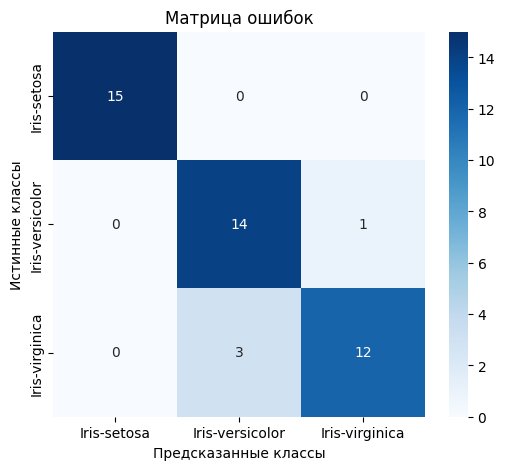

In [13]:
# Матрица ошибок

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Матрица ошибок')
plt.ylabel('Истинные классы')
plt.xlabel('Предсказанные классы')
plt.show()

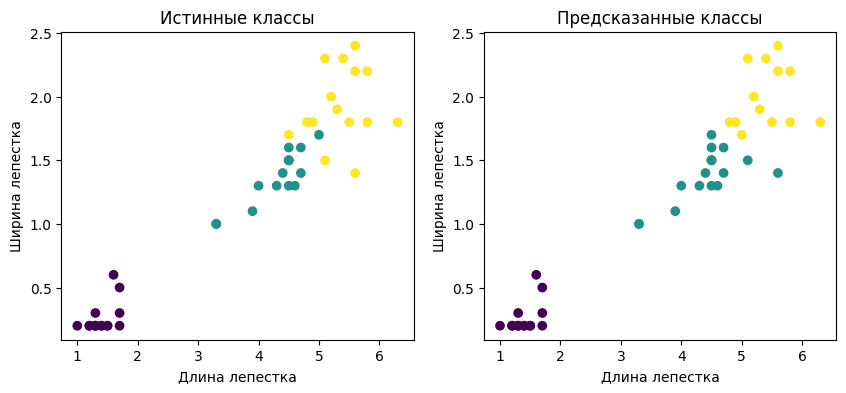

In [15]:
plt.figure(figsize=(10, 4))

# Истинные классы
plt.subplot(1, 2, 1)
plt.scatter(
    X_test['petal_length'],
    X_test['petal_width'],
    c=y_test.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}),
    cmap='viridis'
)
plt.title('Истинные классы')
plt.xlabel('Длина лепестка')
plt.ylabel('Ширина лепестка')

# Предсказанные классы
plt.subplot(1, 2, 2)
plt.scatter(
    X_test['petal_length'],
    X_test['petal_width'],
    c=pd.Series(y_pred).map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}),
    cmap='viridis'
)
plt.title('Предсказанные классы')
plt.xlabel('Длина лепестка')
plt.ylabel('Ширина лепестка')

plt.show()